In [2]:
from langgraph.graph import StateGraph,START,END
from langchain_core.messages import HumanMessage,BaseMessage
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import Annotated,TypedDict
from langgraph.checkpoint.memory import InMemorySaver

d:\Study_Tutorials\Agentic_AI_Concepts_using_Langgraph\myenv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [2]:
load_dotenv()

True

In [3]:
model=ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [4]:
class jokeState(TypedDict):
    topic:str
    joke:str
    explanation:str

In [5]:
def generateJoke(state:jokeState):
    topic=state['topic']
    prompt=f'Generate a joke on the topic {topic}'
    res=model.invoke(prompt)
    return {'joke':res}

In [6]:
def generateExplanation(state:jokeState):
    joke=state['joke']
    prompt=f'Genrate an exlanation of the joke:{joke}'
    res=model.invoke(prompt)
    return {'explanation':res}

In [9]:
graph=StateGraph(jokeState)

graph.add_node('generateJoke',generateJoke)
graph.add_node('generateExplanation',generateExplanation)

graph.add_edge(START,'generateJoke')
graph.add_edge('generateJoke','generateExplanation')
graph.add_edge('generateExplanation',END)

checkpoint=InMemorySaver()

workflow=graph.compile(checkpointer=checkpoint)

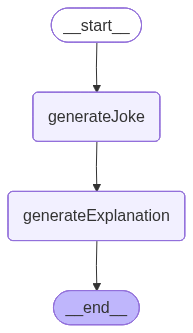

In [11]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [12]:
config1={'configurable':{'thread_id':'1'}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': AIMessage(content='Why did the pizza get a job?\n\nBecause it **kneaded** the dough!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b5925-57f9-7351-83a9-8d68ea7bc99b-0', usage_metadata={'input_tokens': 8, 'output_tokens': 1050, 'total_tokens': 1058, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1032}}),
 'explanation': AIMessage(content='This joke is a pun, which is a form of wordplay that exploits multiple meanings of a word or of similar-sounding words for an intended humorous or rhetorical effect.\n\nHere\'s the breakdown:\n\n1.  **"Why did the pizza get a job?"**\n    *   This sets up a question that suggests a pizza, an inanimate food item, has human-like agency (getting a job). This immediately cues the listener that the answer will likely be absurd or a play on words.\n\n2.  **"Because it **kn

In [13]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': AIMessage(content='Why did the pizza get a job?\n\nBecause it **kneaded** the dough!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b5925-57f9-7351-83a9-8d68ea7bc99b-0', usage_metadata={'input_tokens': 8, 'output_tokens': 1050, 'total_tokens': 1058, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1032}}), 'explanation': AIMessage(content='This joke is a pun, which is a form of wordplay that exploits multiple meanings of a word or of similar-sounding words for an intended humorous or rhetorical effect.\n\nHere\'s the breakdown:\n\n1.  **"Why did the pizza get a job?"**\n    *   This sets up a question that suggests a pizza, an inanimate food item, has human-like agency (getting a job). This immediately cues the listener that the answer will likely be absurd or a play on words.\n\n2. 

In [14]:

list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': AIMessage(content='Why did the pizza get a job?\n\nBecause it **kneaded** the dough!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b5925-57f9-7351-83a9-8d68ea7bc99b-0', usage_metadata={'input_tokens': 8, 'output_tokens': 1050, 'total_tokens': 1058, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1032}}), 'explanation': AIMessage(content='This joke is a pun, which is a form of wordplay that exploits multiple meanings of a word or of similar-sounding words for an intended humorous or rhetorical effect.\n\nHere\'s the breakdown:\n\n1.  **"Why did the pizza get a job?"**\n    *   This sets up a question that suggests a pizza, an inanimate food item, has human-like agency (getting a job). This immediately cues the listener that the answer will likely be absurd or a play on words.\n\n2.

# Time travel

In [15]:
workflow.get_state({'configurable':{"thread_id":'1','checkpoint_id': '1f0e21c5-a576-67bc-8001-91920b2383ff'}})

StateSnapshot(values={'topic': 'pizza', 'joke': AIMessage(content='Why did the pizza get a job?\n\nBecause it **kneaded** the dough!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b5925-57f9-7351-83a9-8d68ea7bc99b-0', usage_metadata={'input_tokens': 8, 'output_tokens': 1050, 'total_tokens': 1058, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1032}})}, next=('generateExplanation',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0e21c5-a576-67bc-8001-91920b2383ff'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-12-26T05:33:05.112454+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e21c5-63d9-6c33-8000-16a8016b934e'}}, tasks=(PregelTask(id='9b844c18-06b4-c030-7d64-fabc88169e0d', name='generateExplanation', path=('__pregel_pull', 'generat

In [16]:
workflow.invoke(None,{'configurable':{"thread_id":'1','checkpoint_id': '1f0e21c5-63d9-6c33-8000-16a8016b934e'}})

{'topic': 'pizza',
 'joke': AIMessage(content='Why did the pizza get an award?\n\nBecause it always **delivered**!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b593d-a099-7940-b1d6-c3ccaab389be-0', usage_metadata={'input_tokens': 8, 'output_tokens': 1803, 'total_tokens': 1811, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1787}}),
 'explanation': AIMessage(content='This joke is a pun that plays on the word "**delivered**" having two different meanings.\n\nHere\'s the breakdown:\n\n1.  **Literal Meaning (Pizza Context):** When you order a pizza, it is literally "delivered" to your home or chosen location. This is the primary function of many pizza establishments – to bring the food to the customer.\n\n2.  **Figurative Meaning (Achievement Context):** In a broader sense, to "deliver" also means to succeed, to fulfill a promise,

In [17]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': AIMessage(content='Why did the pizza get an award?\n\nBecause it always **delivered**!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b593d-a099-7940-b1d6-c3ccaab389be-0', usage_metadata={'input_tokens': 8, 'output_tokens': 1803, 'total_tokens': 1811, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1787}}), 'explanation': AIMessage(content='This joke is a pun that plays on the word "**delivered**" having two different meanings.\n\nHere\'s the breakdown:\n\n1.  **Literal Meaning (Pizza Context):** When you order a pizza, it is literally "delivered" to your home or chosen location. This is the primary function of many pizza establishments – to bring the food to the customer.\n\n2.  **Figurative Meaning (Achievement Context):** In a broader sense, to "deliver" also means to succeed, t

# Updating state

In [18]:
workflow.update_state({"configurable": {"thread_id": "1", 'checkpoint_id': '1f0e21c5-63d7-6458-bfff-3c2b0a77ebf4', "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0e2206-b9f8-6519-8000-6ef141b9dcbd'}}

In [19]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generateJoke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e2206-b9f8-6519-8000-6ef141b9dcbd'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2025-12-26T06:02:12.093240+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e21c5-63d7-6458-bfff-3c2b0a77ebf4'}}, tasks=(PregelTask(id='f6685fc9-68b7-03f1-2c19-c3940794e0bf', name='generateJoke', path=('__pregel_pull', 'generateJoke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': AIMessage(content='Why did the pizza get an award?\n\nBecause it always **delivered**!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b593d-a099-7940-b1d6-c3ccaab389be-0', usage_metadata={'input_tokens': 8, 

In [ ]:
workflow.invoke(None, {"configurable": {"thread_id": "1", 'checkpoint_id': '1f0e21c5-63d7-6458-bfff-3c2b0a77ebf4', "checkpoint_ns": ""}})
#generate a joke on samosa

In [ ]:
list(workflow.get_state_history(config1))

# Fault Tolerance

In [3]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [4]:
import time

# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [6]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

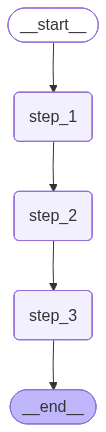

In [7]:
from IPython.display import Image
Image(graph.get_graph().draw_mermaid_png())

In [ ]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)


In [ ]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...


NameError: name 'graph' is not defined

In [ ]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))